In [1]:
import pandas as pd
import numpy as np


from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D

from keras.layers import SimpleRNN, Embedding


## DEMO

# For univariate time series: vanilla LSTM

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction. Vanilla LSTM for univariate time series forecasting. We are working with a univariate series, so the number of features is one, for one variable.

The number of time steps as input is the number we chose when preparing our dataset as an argument to the split_sequence() function.

The shape of the input for each sample is specified in the input_shape argument on the definition of first hidden layer.

The split_sequence() function below maps a sequence of past observations as input to an output observation. As such, the sequence of observations must be transformed into multiple examples from which the LSTM can learn. and will split a given univariate sequence into multiple samples where each sample has a specified number of time steps and the output is a single time step.

In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


Key in the definition is the shape of the input; that is what the model expects as input for each sample in terms of the number of time steps and the number of features.

We are working with a univariate series, so the number of features is one, for one variable.

The number of time steps as input is the number we chose when preparing our dataset as an argument to the split_sequence() function.

The shape of the input for each sample is specified in the input_shape argument on the definition of first hidden layer.

We almost always have multiple samples, therefore, the model will expect the input component of training data to have the dimensions or shape: [samples, timesteps, features]

In [4]:
X.shape

(6, 3)

In [5]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [6]:
X.shape

(6, 3, 1)

In [7]:
X

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]],

       [[60],
        [70],
        [80]]])

In [8]:
X.shape

(6, 3, 1)

In [9]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [11]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.35599]]


In [12]:
model.evaluate(X,y)

1/1 [==============================] - 0s 290ms/step - loss: 0.5636


0.5635913014411926

In [13]:
#To predict the next multiple steps

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])


[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [14]:
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70],
       [60, 70, 80]])

In [15]:
y

array([40, 50, 60, 70, 80, 90])

In [16]:
X.shape

(6, 3)

In [17]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [18]:
X.shape

(6, 3, 1)

In [19]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse')

In [20]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [21]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.01178  101.9293   101.20247  102.088066 102.12341 ]]


In [22]:
model.evaluate(X,y)

1/1 [==============================] - 0s 226ms/step - loss: 1.2803


1.280314326286316


__What is a dense layer__? When all the neurons in a layer are connected to every neuron in the previous layer (for example, the input layer), it is called a fully connected or dense layer. Each dense layer layer manages its own weight matix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms(one per neuron). Once it receives some input data, it computes XW+b

__On hidden layers__: The neurons in the first hidden layer learns simple patterns from the input, while the second hidden layers then combines the simple patterns from the first hidden layer into more complex patterns and so on. The more layers there are, the more complex the patterns can be. One single layer can model complex functions provided it has enough neurons. However, for complex problems, deep networks have a much higher parameters eficiency than shallow ones which enables them to reach much better performance with the same amount of training data. It helps DNNs converge faster to a good solution and also improves their ability to generalize to new datasets.

__On Neurons__: The number of input and output layers is determined by the type of input and output the task requires. In practice, it is efficient to pick a model with more layers and neurons than we need, then use early stopping and other regulization techniques to prevent overfitting. In general, one could get more accuracy by increasing number of layers instead of number of neurons.

__On activation functions__: To enable our model output any range of values, we need not include an activation function for the output neuron.

__On Sequential APIs__: It is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially.
    
__How do we then choose the best parameters?__ Use randomized search, Hyperopt(a library for optizing over all sort of complex search space), hyperas, kopt, or Talos (libraries for optimizing hyperparameters for keras models).

__The difference between the models__: Both MLP and CNN can be used for Image classification however MLP takes vector as input and CNN takes tensor ( (image_height, image_width, color_channels) as input so CNN can understand relation between nearby pixels of image better. 
So for complicated images, CNN will perform better than MLP. 
CNN is designed to work for Images or Videos classification.

RNN is designed to work for problems related to sequence like sequence of words in a sentence for NLP or sequence of sounds in speech recognition or processing.

So MLP is good for simple image classification,
CNN is good for complicated image classification,
and RNN is good for sequence processing.

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense_1'

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.12210858, -0.29742852,  0.26207918,  0.30627638,  0.30391854],
       [ 0.1287108 ,  0.26392967,  0.18815047,  0.06948057,  0.27923238],
       [-0.26874736,  0.3138451 , -0.31340063,  0.08870661, -0.28902826],
       [ 0.1281084 , -0.25862014, -0.16048047, -0.09700622, -0.24483573],
       [-0.2753052 ,  0.03325362, -0.27788925, -0.28995362, -0.24782759],
       [-0.1405639 ,  0.21824008,  0.26279306,  0.18612397,  0.07253155],
       [ 0.3958949 ,  0.2164954 ,  0.24604288, -0.22521293, -0.02319966],
       [-0.19143459,  0.02659565, -0.03192744, -0.15765344,  0.20976889],
       [-0.4508551 , -0.3032045 , -0.21823728,  0.10533374, -0.35982457],
       [ 0.14052781,  0.00838554, -0.08938941, -0.11770982,  0.24039158],
       [ 0.39723554, -0.15307018, -0.03593358,  0.39509034, -0.17086124],
       [ 0.20770687,  0.13897446, -0.28023922,  0.30667633, -0.11341923],
       [ 0.30794746,  0.26141995,  0.15366396, -0.15520519, -0.16739066],
       [-0.05583104, -0.01172033,  0.2

In [26]:
weights.shape

(50, 5)

In [27]:
biases

array([0.06376693, 0.05968875, 0.06061279, 0.07234608, 0.08081085],
      dtype=float32)

In [28]:
biases.shape

(5,)

In [29]:
model.evaluate(X,y)

1/1 [==============================] - 0s 20ms/step - loss: 1.2803


1.280314326286316

# To predict multiple steps ahead

In [3]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


# choose a number of time steps
n_steps_in, n_steps_out = 3, 2


# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(X, y, epochs=50, verbose=0)


# demonstrate prediction
x_input = array([210, 220, 230])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)


print(yhat)

[[243.65732 267.03348]]


In [4]:
X.shape

(16, 3, 1)

In [5]:
X.shape

(16, 3, 1)

In [4]:
y

array([[ 40,  50],
       [ 50,  60],
       [ 60,  70],
       [ 70,  80],
       [ 80,  90],
       [ 90, 100],
       [100, 110],
       [110, 120],
       [120, 130],
       [130, 140],
       [140, 150],
       [150, 160],
       [160, 170],
       [170, 180],
       [180, 190],
       [190, 200]])

In [7]:
y.shape

(16, 2)

# RNN

In [36]:
# define model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [37]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [39]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[108.75971 107.6665 ]]


In [50]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse')


In [51]:
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

ValueError: cannot reshape array of size 3 into shape (1,5,1)

In [82]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [83]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


## Stacked LSTM
Stacked LSTM is when multiple hidden LSTM layers can be stacked one on top of another

In [84]:
# define model for stacked LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')


In [85]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [86]:

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[103.98747 104.03041]]



## Bidirectional LSTM
On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.This is called a Bidirectional LSTM. We can implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.

In [87]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse')

In [88]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [90]:

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.44034  101.81838  101.309975 101.19398  102.4905  ]]


## CNN LSTM
A CNN model can be used in a hybrid model with an LSTM backend where the CNN is used to interpret subsequences of input that together are provided as a sequence to an LSTM model to interpret. 
The first step is to split the input sequences into subsequences that can be processed by the CNN model. For example, we can first split our univariate time series data into input/output samples with four steps as input and one as output. Each sample can then be split into two sub-samples, each with two time steps. The CNN can interpret each subsequence of two time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [91]:
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [92]:
X

array([[[[10],
         [20]],

        [[30],
         [40]]],


       [[[20],
         [30]],

        [[40],
         [50]]],


       [[[30],
         [40]],

        [[50],
         [60]]],


       [[[40],
         [50]],

        [[60],
         [70]]],


       [[[50],
         [60]],

        [[70],
         [80]]]])

In [96]:
#The number of filters is the number of reads or interpretations of the input sequence. The kernel size is the number of time steps included of each ‘read’ operation of the input sequence.

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[100.4241]]


## ConvLSTM
A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading of input is built directly into each LSTM unit.

In [97]:
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [100]:
# We can define the ConvLSTM as a single layer in terms of the number of filters and a two-dimensional kernel size in terms of (rows, columns). As we are working with a one-dimensional series, the number of rows is always fixed to 1 in the kernel.

# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[104.07634]]


## Multivariate LSTM

The first dimension is the number of samples. The second dimension is the number of time steps per sample, the value specified to the function. Finally, the last dimension specifies the number of parallel time series or the number of variables, in this case 2 for the two parallel series.

This is the exact three-dimensional structure expected by an LSTM as input

In [43]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [44]:
out_seq

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

We can reshape these three arrays of data as a single dataset where each row is a time step, and each column is a separate time series

In [45]:
in_seq1.reshape((len(in_seq1), 1))

array([[10],
       [20],
       [30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

In [46]:
from numpy import hstack

In [47]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

In [48]:
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [49]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [50]:
# choose a number of time steps
n_steps = 3

In [51]:
in_seq1

array([[10],
       [20],
       [30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

In [52]:
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [53]:
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]


In [54]:
X

array([[[10, 15],
        [20, 25],
        [30, 35]],

       [[20, 25],
        [30, 35],
        [40, 45]],

       [[30, 35],
        [40, 45],
        [50, 55]],

       [[40, 45],
        [50, 55],
        [60, 65]],

       [[50, 55],
        [60, 65],
        [70, 75]],

       [[60, 65],
        [70, 75],
        [80, 85]],

       [[70, 75],
        [80, 85],
        [90, 95]]])

In [55]:
y

array([ 65,  85, 105, 125, 145, 165, 185])

In [56]:
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [57]:
X.shape

(7, 3, 2)

In [65]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [66]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [67]:


# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[206.81354]]


## Multiple Parallel Series
 This is the case where there are multiple parallel time series and a value must be predicted for each.

In [68]:
#The split_sequences() function below will split multiple parallel time series with rows for time steps and one series per column into the required input/output shape.
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [69]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [70]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [71]:
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3

In [72]:
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


In [73]:
X

array([[[ 10,  15,  25],
        [ 20,  25,  45],
        [ 30,  35,  65]],

       [[ 20,  25,  45],
        [ 30,  35,  65],
        [ 40,  45,  85]],

       [[ 30,  35,  65],
        [ 40,  45,  85],
        [ 50,  55, 105]],

       [[ 40,  45,  85],
        [ 50,  55, 105],
        [ 60,  65, 125]],

       [[ 50,  55, 105],
        [ 60,  65, 125],
        [ 70,  75, 145]],

       [[ 60,  65, 125],
        [ 70,  75, 145],
        [ 80,  85, 165]]])

In [74]:
y

array([[ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [243]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [244]:
# demonstrate prediction
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

ValueError: cannot reshape array of size 9 into shape (1,3,2)

In [245]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(5, 3, 3) (5, 2, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]


In [247]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
#model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
#model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)
# demonstrate prediction
x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

ValueError: Input 0 of layer "lstm_49" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 200)

# CNN

In [88]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
 


In [89]:
# define input sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])


In [90]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = np.hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3


In [92]:
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]



In [96]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = np.hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[207.89899]]


In [97]:
import os
print('Number of CPUs in the system: {}'.format(os.cpu_count()))

Number of CPUs in the system: 8


'ipcluster' is not recognized as an internal or external command,
operable program or batch file.


In [100]:
pip install ipyparallel

In [ ]:
!ipcluster start -n 10

In [118]:
fashion_mnist = keras.datasets.fashion_mnist

In [119]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from 'C:\\Users\\e.olalekan-elesin\\Anaconda3\\lib\\site-packages\\keras\\datasets\\fashion_mnist.py'>

In [120]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [121]:
X_train_full.shape

(60000, 28, 28)

In [122]:
X_train_full.dtype

dtype('uint8')

In [123]:
y_train_full.shape

(60000,)

In [124]:
X_test.shape

(10000, 28, 28)

In [125]:
# For validation

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [126]:
X_valid.shape

(5000, 28, 28)

In [127]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [128]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [129]:
class_names[y_train[0]]

'Coat'

In [130]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [131]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 300)               235500    
                                                                 
 dense_33 (Dense)            (None, 100)               30100     
                                                                 
 dense_34 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.layers

In [175]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [177]:
housing = fetch_california_housing()

In [178]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [179]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [180]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [181]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
                                 

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6774 - val_loss: 0.5687
Epoch 2/20
363/363 [==============================] - 0s 822us/step - loss: 0.5228 - val_loss: 0.4449
Epoch 3/20
363/363 [==============================] - 0s 941us/step - loss: 0.4691 - val_loss: 0.4051
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4454 - val_loss: 0.3926
Epoch 5/20
363/363 [==============================] - 0s 923us/step - loss: 0.4350 - val_loss: 0.3805
Epoch 6/20
363/363 [==============================] - 0s 825us/step - loss: 0.4251 - val_loss: 0.3788
Epoch 7/20
363/363 [==============================] - 0s 873us/step - loss: 0.4187 - val_loss: 0.3801
Epoch 8/20
363/363 [==============================] - 0s 861us/step - loss: 0.4158 - val_loss: 0.3705
Epoch 9/20
363/363 [==============================] - 0s 850us/step - loss: 0.4099 - val_loss: 0.3623
Epoch 10/20
363/363 [==============================] - 0s 938us/step - loss: 0.4057 - 

In [182]:
history.history

{'loss': [1.6773980855941772,
  0.5228172540664673,
  0.4690600037574768,
  0.44538798928260803,
  0.4349824786186218,
  0.4250929057598114,
  0.4187019169330597,
  0.4158228039741516,
  0.4098873734474182,
  0.4056726396083832,
  0.4017767012119293,
  0.3988801836967468,
  0.39489954710006714,
  0.392037957906723,
  0.3899012804031372,
  0.3855985999107361,
  0.382497102022171,
  0.3821185529232025,
  0.38179799914360046,
  0.37823691964149475],
 'val_loss': [0.5687083005905151,
  0.4449308216571808,
  0.40514951944351196,
  0.3926401436328888,
  0.38046926259994507,
  0.3788161277770996,
  0.3800828158855438,
  0.3704510033130646,
  0.3623262643814087,
  0.3600783348083496,
  0.3596966862678528,
  0.3523726463317871,
  0.35544276237487793,
  0.3574986159801483,
  0.34569424390792847,
  0.3442559540271759,
  0.34290018677711487,
  0.34477293491363525,
  0.3391612470149994,
  0.33990174531936646]}

In [174]:
from sklearn.datasets import load_sample_image

In [175]:
china = load_sample_image('china.jpg')/255
flower = load_sample_image('flower.jpg')/255

In [176]:
images = np.array([china, flower])

In [178]:
batch_size, height, width, channels = images.shape

In [181]:
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

In [182]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')

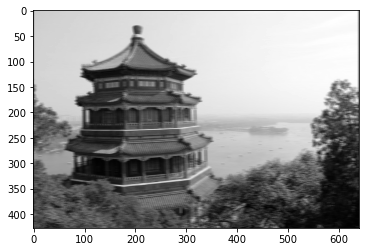

In [183]:
plt.imshow(outputs[0, :, :, 1], cmap='gray')

In [184]:
plt.show()

# Demo using time series dataset

In [6]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) #wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) #wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) #noise
    return series[..., np.newaxis].astype(np.float32)

This function creates as many time series as requested (via the batch_size argument), each of length n_steps, and there is just one value per time step in each series (that is, all series are univariate). The function returns a NumPy array of shape  [batch size, time steps, 1], where each series is the sum of 2 sine waves of fixed amplitudes but random frequencies and phases with a bit of noise

Time series and other sequences such as sentences have their input features represented as 3D arrays of shape (batch size, time steps, dimentionality) 

In [7]:
# to create training set, validation set and set test

#This predicts 1 step ahead

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000:, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [8]:
X_train

array([[[ 0.48324317],
        [ 0.37518412],
        [ 0.156684  ],
        ...,
        [ 0.5871168 ],
        [ 0.5671267 ],
        [ 0.35694697]],

       [[-0.3567758 ],
        [-0.22875988],
        [ 0.02194327],
        ...,
        [ 0.05871842],
        [-0.0146201 ],
        [-0.07083055]],

       [[-0.1291342 ],
        [-0.29922932],
        [-0.43288234],
        ...,
        [-0.23508753],
        [-0.32837528],
        [-0.33066893]],

       ...,

       [[ 0.03313443],
        [ 0.12075923],
        [ 0.28029534],
        ...,
        [-0.10613614],
        [-0.20502315],
        [-0.3411431 ]],

       [[ 0.52035874],
        [ 0.47067955],
        [ 0.29588953],
        ...,
        [ 0.6126631 ],
        [ 0.53040534],
        [ 0.38040048]],

       [[-0.10296227],
        [-0.28068677],
        [-0.3983089 ],
        ...,
        [-0.51382136],
        [-0.3064759 ],
        [-0.05288179]]], dtype=float32)

In [9]:
y_train

array([[ 0.14968053],
       [-0.19940615],
       [-0.33947176],
       ...,
       [-0.35346472],
       [ 0.22054245],
       [ 0.13743973]], dtype=float32)

In [14]:
len(X_train)

7000

In [11]:
len(y_train[1])

1

In [12]:
X_test

array([[[ 0.26118985],
        [ 0.31679103],
        [ 0.32168707],
        ...,
        [-0.08630545],
        [ 0.02916951],
        [ 0.15316395]],

       [[ 0.23445578],
        [ 0.36575443],
        [ 0.5668433 ],
        ...,
        [ 0.11348081],
        [ 0.14787883],
        [ 0.29362565]],

       [[-0.09233636],
        [-0.05576532],
        [-0.04016936],
        ...,
        [ 0.61031604],
        [ 0.33629158],
        [ 0.08602136]],

       ...,

       [[ 0.3030281 ],
        [ 0.46295175],
        [ 0.43861654],
        ...,
        [-0.2613105 ],
        [-0.08060499],
        [ 0.04045949]],

       [[-0.32762223],
        [-0.5011419 ],
        [-0.5705099 ],
        ...,
        [ 0.28141093],
        [ 0.24088028],
        [ 0.16920589]],

       [[-0.17180258],
        [-0.14607249],
        [-0.23872532],
        ...,
        [ 0.26994726],
        [ 0.33585098],
        [ 0.24846762]]], dtype=float32)

In [13]:
len(X_test)

1000

In [15]:
y_test

array([[ 2.32017562e-01],
       [ 4.38822031e-01],
       [-1.36736885e-01],
       [-2.21853435e-01],
       [ 1.12880290e-01],
       [-3.15940857e-01],
       [ 2.42649242e-01],
       [-1.26840234e-01],
       [-3.58654350e-01],
       [-4.87397872e-02],
       [ 6.84618503e-02],
       [ 7.26060271e-01],
       [-2.59027630e-01],
       [-5.43237571e-03],
       [-2.93926984e-01],
       [ 2.91165709e-01],
       [ 2.71535784e-01],
       [ 1.90636758e-02],
       [ 3.74276817e-01],
       [ 2.59276927e-01],
       [-5.62397718e-01],
       [-1.47705823e-01],
       [ 5.46912491e-01],
       [-2.03975797e-01],
       [-7.13862404e-02],
       [-5.93598485e-01],
       [-2.30790526e-01],
       [ 6.25722349e-01],
       [ 8.41671228e-02],
       [-2.35229805e-01],
       [ 2.04297349e-01],
       [-6.05720043e-01],
       [-5.51518872e-02],
       [ 3.28790337e-01],
       [ 2.90098116e-02],
       [ 4.86472845e-01],
       [ 9.60567147e-02],
       [ 2.77175814e-01],
       [ 5.1

In [29]:
y_test[2]

array([-0.13673688], dtype=float32)

## Defining the model

In [149]:
# W e do not need to specify the length of the input sequence since RNNs can process any number of time steps. They also use Tanh by default

model = Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]), #to output 3D array (containing outputs for all time steps, include return_sequences=True)
    keras.layers.SimpleRNN(10),
    keras.layers.Dense(1)
])

## compile and fit

In [150]:
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=20, verbose=0)

In [18]:
model.evaluate(X_train,y_train)

219/219 [==============================] - 1s 3ms/step - loss: 0.0027


0.0027271579019725323

In [19]:
len(X_test)

1000

In [20]:
len(X_test[1])

50

In [21]:
X_test[1:3]

array([[[ 0.23445578],
        [ 0.36575443],
        [ 0.5668433 ],
        [ 0.6463531 ],
        [ 0.6797406 ],
        [ 0.54984516],
        [ 0.3505073 ],
        [ 0.15390608],
        [-0.08814138],
        [-0.22341107],
        [-0.36075294],
        [-0.29294056],
        [-0.3094212 ],
        [-0.31514367],
        [-0.31838733],
        [-0.3438936 ],
        [-0.4183634 ],
        [-0.5427741 ],
        [-0.4583757 ],
        [-0.38603938],
        [-0.18964249],
        [ 0.02101759],
        [ 0.3020612 ],
        [ 0.46731654],
        [ 0.54119736],
        [ 0.53589934],
        [ 0.5183487 ],
        [ 0.37469873],
        [ 0.31672445],
        [ 0.18793117],
        [ 0.1999958 ],
        [ 0.17062525],
        [ 0.22404698],
        [ 0.1717026 ],
        [-0.01220428],
        [-0.22329752],
        [-0.40238008],
        [-0.63275   ],
        [-0.6966617 ],
        [-0.68141437],
        [-0.5666854 ],
        [-0.39645082],
        [-0.18105565],
        [ 0

## predict

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([[ 0.22478887],
       [ 0.3922552 ],
       [-0.23531719],
       [-0.31706607],
       [ 0.17524315],
       [-0.26484555],
       [ 0.22009772],
       [-0.06971448],
       [-0.27264923],
       [ 0.04700462],
       [ 0.06131447],
       [ 0.70676017],
       [-0.28193444],
       [ 0.05632901],
       [-0.32117674],
       [ 0.28896096],
       [ 0.37181774],
       [ 0.0711279 ],
       [ 0.38483942],
       [ 0.29734987],
       [-0.5207099 ],
       [-0.15053624],
       [ 0.67447114],
       [-0.26901072],
       [-0.08045584],
       [-0.5202575 ],
       [-0.2355587 ],
       [ 0.52980286],
       [ 0.09056868],
       [-0.16176338],
       [ 0.21139073],
       [-0.5954782 ],
       [-0.03437537],
       [ 0.32848778],
       [ 0.08252402],
       [ 0.44337082],
       [ 0.06683279],
       [ 0.25784317],
       [ 0.21499637],
       [-0.29207498],
       [-0.3234774 ],
       [-0.03486888],
       [ 0.48451495],
       [-0.13161175],
       [ 0.3009128 ],
       [ 0

In [24]:
len(y_pred)

1000

In [25]:
y_pred[0]

array([0.22478887], dtype=float32)

In [26]:
y_pred[2]

array([-0.23531719], dtype=float32)

In [30]:
np.mean(keras.losses.mean_squared_error(y_test, y_pred))

0.002844816

# Forecasting several time steps ahead

In [31]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis = 1)

In [34]:
len(series[0])

60

In [37]:
len(X_new[0])

50

In [38]:
X

array([[[-0.5695774 ],
        [-0.38099477],
        [-0.16373152],
        [ 0.03001991],
        [ 0.3510396 ],
        [ 0.5214558 ],
        [ 0.5188836 ],
        [ 0.57440317],
        [ 0.46112776],
        [ 0.36740083],
        [ 0.24170066],
        [ 0.18850608],
        [ 0.16882268],
        [ 0.22516914],
        [ 0.17256328],
        [ 0.13244057],
        [ 0.00751954],
        [-0.21356243],
        [-0.40912002],
        [-0.5282538 ],
        [-0.67679435],
        [-0.67035145],
        [-0.5485076 ],
        [-0.47272384],
        [-0.1855762 ],
        [-0.04468944],
        [ 0.16223449],
        [ 0.22482458],
        [ 0.21386917],
        [ 0.25237548],
        [ 0.20808461],
        [ 0.23528358],
        [ 0.32388702],
        [ 0.41130972],
        [ 0.49730736],
        [ 0.5110459 ],
        [ 0.48515168],
        [ 0.28218812],
        [ 0.07388017],
        [-0.09332775],
        [-0.36263186],
        [-0.554466  ],
        [-0.62524164],
        [-0

In [40]:
y_pred = X[:, n_steps:]

In [41]:
y_pred

array([[[-0.12106632],
        [-0.06143082],
        [ 0.05516469],
        [ 0.20806195],
        [ 0.3887439 ],
        [ 0.53587687],
        [ 0.62325215],
        [ 0.62658393],
        [ 0.54173213],
        [ 0.39767948]]], dtype=float32)

In [42]:
len(y_pred)

1

## #Forecasting several steps ahead using sequence to vector which will predict 10 values at once. We change the targets to be vectors containing the next 10 values


In [52]:

series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[9000:, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [53]:
len(series[1])

60

In [54]:
series[0]

array([[ 0.00280858],
       [-0.12584022],
       [-0.28160056],
       [-0.4164097 ],
       [-0.6396356 ],
       [-0.679799  ],
       [-0.6104205 ],
       [-0.41581166],
       [-0.16287628],
       [ 0.13651082],
       [ 0.4078412 ],
       [ 0.5570541 ],
       [ 0.5553008 ],
       [ 0.52346075],
       [ 0.38563707],
       [ 0.24012475],
       [ 0.09648385],
       [ 0.01644529],
       [ 0.02098775],
       [-0.08378287],
       [-0.10747279],
       [-0.23251343],
       [-0.37753397],
       [-0.47485757],
       [-0.6185279 ],
       [-0.5667253 ],
       [-0.46061045],
       [-0.23448218],
       [-0.02067875],
       [ 0.3051825 ],
       [ 0.5220473 ],
       [ 0.6319044 ],
       [ 0.6567312 ],
       [ 0.55860204],
       [ 0.38981533],
       [ 0.17075436],
       [ 0.02279919],
       [-0.0240273 ],
       [-0.1198948 ],
       [-0.15816586],
       [-0.2356753 ],
       [-0.27681813],
       [-0.32756704],
       [-0.50864714],
       [-0.5317629 ],
       [-0

In [55]:
X_train[0]

array([[ 0.00280858],
       [-0.12584022],
       [-0.28160056],
       [-0.4164097 ],
       [-0.6396356 ],
       [-0.679799  ],
       [-0.6104205 ],
       [-0.41581166],
       [-0.16287628],
       [ 0.13651082],
       [ 0.4078412 ],
       [ 0.5570541 ],
       [ 0.5553008 ],
       [ 0.52346075],
       [ 0.38563707],
       [ 0.24012475],
       [ 0.09648385],
       [ 0.01644529],
       [ 0.02098775],
       [-0.08378287],
       [-0.10747279],
       [-0.23251343],
       [-0.37753397],
       [-0.47485757],
       [-0.6185279 ],
       [-0.5667253 ],
       [-0.46061045],
       [-0.23448218],
       [-0.02067875],
       [ 0.3051825 ],
       [ 0.5220473 ],
       [ 0.6319044 ],
       [ 0.6567312 ],
       [ 0.55860204],
       [ 0.38981533],
       [ 0.17075436],
       [ 0.02279919],
       [-0.0240273 ],
       [-0.1198948 ],
       [-0.15816586],
       [-0.2356753 ],
       [-0.27681813],
       [-0.32756704],
       [-0.50864714],
       [-0.5317629 ],
       [-0

In [56]:
X_train.shape

(7000, 50, 1)

In [57]:
Y_train.shape

(7000, 10)

In [58]:
Y_test

array([[ 0.7244786 ,  0.59040457,  0.41794845, ..., -0.42494458,
        -0.5252574 , -0.48517585],
       [ 0.04606282,  0.18160361,  0.17949845, ...,  0.35320804,
         0.39735535,  0.4775305 ],
       [ 0.26256037,  0.49562064,  0.63171357, ...,  0.2691886 ,
         0.06835045, -0.13918449],
       ...,
       [-0.44351438, -0.39258578, -0.27588043, ..., -0.16303357,
        -0.18024422, -0.17316876],
       [-0.68484604, -0.7086375 , -0.687725  , ...,  0.24858944,
         0.51757526,  0.60530216],
       [ 0.5585058 ,  0.66484386,  0.6632247 , ...,  0.10444341,
        -0.04733051, -0.08723141]], dtype=float32)

In [59]:
len(Y_test[1])

10

## Defining the model

In [60]:
model = Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]), 
    keras.layers.SimpleRNN(20, return_sequences = True),
    keras.layers.SimpleRNN(10)
])

In [61]:
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, verbose=0)

In [62]:
Y_pred = model.predict(X_test)

In [63]:
Y_pred[1]

array([0.04281534, 0.03785443, 0.03800269, 0.04465254, 0.0467888 ,
       0.03258369, 0.03043631, 0.03826261, 0.03658772, 0.02425447],
      dtype=float32)

In [66]:
Y_test[1]

array([0.04606282, 0.18160361, 0.17949845, 0.25681373, 0.24071006,
       0.18469709, 0.27984127, 0.35320804, 0.39735535, 0.4775305 ],
      dtype=float32)

In [67]:
Y_pred[2]

array([0.0528865 , 0.0430827 , 0.04292096, 0.05541032, 0.04237924,
       0.03257058, 0.04025126, 0.04076786, 0.03898058, 0.04033438],
      dtype=float32)

In [68]:
Y_test[1]

array([0.04606282, 0.18160361, 0.17949845, 0.25681373, 0.24071006,
       0.18469709, 0.27984127, 0.35320804, 0.39735535, 0.4775305 ],
      dtype=float32)

In [69]:
len(Y_pred)

1000

In [70]:
np.mean(keras.losses.mean_squared_error(Y_test, Y_pred))

0.14632745

## To forecast the next 10 values at each and every step.

In [75]:
Y = np.empty((10000, n_steps, 10)) #each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [76]:
model = Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]), #to output 3D array (containing outputs for all time steps, include return_sequences=True
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.Dense(10)
])

In [77]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [78]:
#optimizer = keras.optimizers.adam(lr=0.01)
model.compile(loss='mse', optimizer = 'adam', metrics = [last_time_step_mse])

In [79]:
y_pred = model.predict(X_test)

In [80]:
np.mean(keras.losses.mean_squared_error(Y_test, y_pred))

0.34841448

# LSTM

This solves the transformations that the data go through when tranversing RNNs as some information are lost at each time step and so after a while, they contain virtually no trace of the first inputs.

In [95]:
Y = np.empty((10000, n_steps, 10)) #each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [96]:
model = Sequential([
    keras.layers.LSTM(20, return_sequences = True, input_shape = [None, 1]), #to output 3D array (containing outputs for all time steps, include return_sequences=True
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dense(10)
])

In [97]:
model.compile(loss='mse', optimizer = 'adam')

In [98]:
model.fit(X_train, Y_train, epochs=20, verbose=0)

In [99]:
Y_pred = model.predict(X_test)

In [100]:
np.mean(keras.losses.mean_squared_error(Y_test, Y_pred))

0.0236278

In [ ]:
# LSTMs still have fairly short-term memory. One way to solve this is to shorten the input sequences

In [104]:
len(Y_test[0])

50

In [105]:
Y_test[0]

array([[-0.49398026, -0.45284256, -0.3201904 , -0.21106677, -0.04581986,
         0.14840047,  0.28494436,  0.44507152,  0.52914852,  0.55795723],
       [-0.45284256, -0.3201904 , -0.21106677, -0.04581986,  0.14840047,
         0.28494436,  0.44507152,  0.52914852,  0.55795723,  0.57092935],
       [-0.3201904 , -0.21106677, -0.04581986,  0.14840047,  0.28494436,
         0.44507152,  0.52914852,  0.55795723,  0.57092935,  0.53048998],
       [-0.21106677, -0.04581986,  0.14840047,  0.28494436,  0.44507152,
         0.52914852,  0.55795723,  0.57092935,  0.53048998,  0.39229321],
       [-0.04581986,  0.14840047,  0.28494436,  0.44507152,  0.52914852,
         0.55795723,  0.57092935,  0.53048998,  0.39229321,  0.39022368],
       [ 0.14840047,  0.28494436,  0.44507152,  0.52914852,  0.55795723,
         0.57092935,  0.53048998,  0.39229321,  0.39022368,  0.2933428 ],
       [ 0.28494436,  0.44507152,  0.52914852,  0.55795723,  0.57092935,
         0.53048998,  0.39229321,  0.39022368

In [107]:
Y_pred[1]

array([[-0.24263163, -0.24546051, -0.19235677, -0.1935378 , -0.08732446,
        -0.0356375 ,  0.02993054,  0.04568681,  0.09808579,  0.12600723],
       [-0.25336963, -0.23300172, -0.19685543, -0.13073859, -0.05164555,
         0.01619665,  0.0742183 ,  0.13876797,  0.17317508,  0.19365364],
       [-0.33623925, -0.31823057, -0.255484  , -0.17058964, -0.08442357,
         0.0162501 ,  0.10370114,  0.21031529,  0.25215134,  0.28375143],
       [-0.3208518 , -0.26748583, -0.16700956, -0.08449168, -0.00948718,
         0.06510265,  0.1395741 ,  0.22048801,  0.25946856,  0.27926716],
       [-0.39267334, -0.35185057, -0.22760047, -0.15838572, -0.04263956,
         0.05517788,  0.16538316,  0.2542358 ,  0.31078303,  0.3280087 ],
       [-0.44235438, -0.38766134, -0.24893643, -0.16032933, -0.01734095,
         0.09021384,  0.2129652 ,  0.29675794,  0.3536192 ,  0.35335416],
       [-0.3958512 , -0.28886482, -0.14092213, -0.02633705,  0.10604025,
         0.19250971,  0.2780389 ,  0.3160646 

In [108]:
np.mean(keras.losses.mean_squared_error(Y_test, Y_pred))

0.0236278

# CNN

Stride is the shift from one receptive field to the next, filters are neurons weights, padding is either set to SAME(then there is zero padding) or VALID(the layer ignores some rows and columns of the input i.e every neuron's receptive field lies strictly within the valid position inside thhe input).

In [112]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[9000:, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [113]:
model = Sequential([
    keras.layers.Conv1D(filters=20,  kernel_size=4, strides=2, padding='valid', input_shape = [None, 1], activation = 'relu'), #to output 3D array (containing outputs for all time steps, include return_sequences=True
    keras.layers.Dense(10)
])

In [114]:
model.compile(loss='mse', optimizer = 'adam')

In [115]:
model.fit(X_train, Y_train, epochs=20, verbose=0)

InvalidArgumentError: Graph execution error:

Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\E3867~1.OLA\AppData\Local\Temp/ipykernel_20912/813590747.py", line 1, in <module>
      model.fit(X_train, Y_train, epochs=20, verbose=0)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\e.olalekan-elesin\Anaconda3\lib\site-packages\keras\losses.py", line 1329, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
Incompatible shapes: [32,10] vs. [32,24,10]
	 [[{{node mean_squared_error/SquaredDifference}}]] [Op:__inference_train_function_76928]

In [38]:
y_pred = model.predict(X_test)

In [39]:
np.mean(keras.losses.mean_squared_error(Y_test, y_pred))

InvalidArgumentError: Incompatible shapes: [1000,24,10] vs. [1000,10] [Op:SquaredDifference]

In [40]:
y_pred

array([[[-0.18585892,  0.00716328,  0.11722723, ..., -0.10716018,
         -0.11233817, -0.27277634],
        [-0.22764555,  0.06562891,  0.14231177, ..., -0.16431594,
         -0.20384206, -0.35388947],
        [-0.1446421 ,  0.23476233,  0.06705365, ..., -0.13312913,
         -0.2703976 , -0.3387366 ],
        ...,
        [ 0.03378169, -0.33435968,  0.0217927 , ...,  0.0679271 ,
          0.2678892 ,  0.24626635],
        [-0.03929896, -0.14987369,  0.04506952, ..., -0.01314755,
          0.07140928,  0.0390516 ],
        [-0.05851668, -0.01488295,  0.03880037, ..., -0.03366779,
         -0.02699501, -0.07427187]],

       [[-0.19169864, -0.23667608,  0.1539764 , ..., -0.08007633,
          0.0611162 , -0.13444175],
        [-0.26232535, -0.0082928 ,  0.1699977 , ..., -0.1714867 ,
         -0.17465702, -0.36085263],
        [-0.16640714,  0.2199886 ,  0.07559612, ..., -0.13631405,
         -0.27705133, -0.36456227],
        ...,
        [ 0.1356767 , -0.0638831 , -0.08208816, ...,  

# Difference between Sequential and Functional APIs

Sequential API allows you to create models layer-by-layer by stacking them. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

In [129]:
from tensorflow.keras.layers import Input,Dense

In [116]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras import layers

seq_model = Sequential()
seq_model.add(layers.Dense(4, input_shape=(10,2)))
seq_model.add(layers.Dense(4))
seq_model.add(layers.Dense(1))
seq_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10, 4)             12        
                                                                 
 dense_12 (Dense)            (None, 10, 4)             20        
                                                                 
 dense_13 (Dense)            (None, 10, 1)             5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [121]:
tf.keras.utils.plot_model(seq_model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [118]:
pip install pydot

In [120]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


Keras functional API provides a more flexibility as you can easily defines models where layers connect to more than just the previous and next layers, and you can connect layers to any other layers. As a result, you can create complex network such as Residual Network. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs. In the functional API, models are created by specifying their inputs and outputs in a graph of layers. That means that a single graph of layers can be used to generate multiple models. You can treat any model as if it were a layer by invoking it on an Input or on the output of another layer. By calling a model you aren't just reusing the architecture of the model, you're also reusing its weights. The functional API makes it easy to manipulate non-linear connectivity topologies -- these are models with layers that are not connected sequentially, which the Sequential API cannot handle

Create a new node in the graph of layers by calling a layer on this inputs object

In [131]:
input1 = Input(shape=(10,2))
lay1 = layers.Dense(4, input_shape=(10,2))(input1)
lay2 = layers.Dense(4)(lay1)
out1 = layers.Dense(1)(lay2)
out2 = layers.Dense(1)(lay2)
func_model = Model(inputs=input1, outputs=[out1, out2])
func_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 10, 4)        12          ['input_2[0][0]']                
                                                                                                  
 dense_20 (Dense)               (None, 10, 4)        20          ['dense_19[0][0]']               
                                                                                                  
 dense_21 (Dense)               (None, 10, 1)        5           ['dense_20[0][0]']               
                                                                                              

In [142]:
inputs = keras.Input(shape=(784,))

In [143]:
inputs.shape

TensorShape([None, 784])

In [146]:
dense = layers.Dense(64, activation="relu")


In [147]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
